In [29]:
import pandas as pd
import seaborn as sns
import numpy as numpy
import matplotlib.pyplot as plt
import pandas_datareader as api
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
## OXY -- Occidental petroleum coprporation
# taken straight from the api
data = api.DataReader('OXY', data_source = 'yahoo', start = '2019-11-30')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,39.160000,38.410000,38.840000,38.680000,10829600.0,36.424660
2019-12-03,38.439999,37.540001,38.380001,38.020000,11535400.0,35.803139
2019-12-04,38.790001,38.169998,38.340000,38.450001,10537700.0,36.208076
2019-12-05,38.799999,37.779999,38.680000,37.980000,9214900.0,35.765476
2019-12-06,39.029999,38.099998,38.110001,39.009998,10411500.0,36.735413


In [4]:
# moving the column around!!
data = data.reindex(columns=['High','Low','Open','Close','Volume','Adj Close','Close'])
data.head()

,High,Low,Open,Close,Volume,Adj Close,Close
Date,,,,,,,
2019-12-02,39.160000,38.410000,38.840000,38.680000,10829600.0,36.424660,38.680000
2019-12-03,38.439999,37.540001,38.380001,38.020000,11535400.0,35.803139,38.020000
2019-12-04,38.790001,38.169998,38.340000,38.450001,10537700.0,36.208076,38.450001
2019-12-05,38.799999,37.779999,38.680000,37.980000,9214900.0,35.765476,37.980000
2019-12-06,39.029999,38.099998,38.110001,39.009998,10411500.0,36.735413,39.009998


In [20]:
data.to_csv('Data/OXY.csv', index='Date', index_label='Date')

In [21]:
stock_data = pd.read_csv('Data/OXY.csv',index_col='Date')

In [18]:
stock_data.isnull().sum()
# Shows there are no missing values

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Close.1      0
dtype: int64

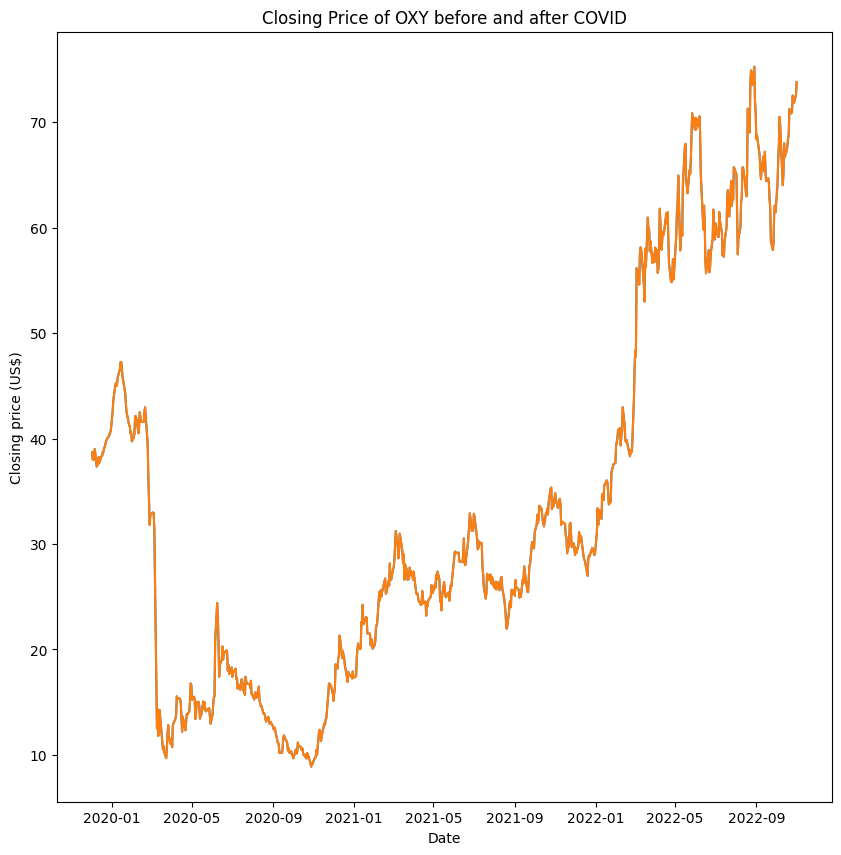

In [23]:
plt.figure(figsize=(10,10))
plt.title("Closing Price of OXY before and after COVID")
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price (US$)')
plt.show()

In [26]:
# Specifying the data for the model
X = data.iloc[:,1:-1].values # the values turns it into a numpy array
Y = data.iloc[:,-1].values

# splitting the data for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=0)





In [28]:
## standard scalar to make the data normally distributed
#Sets the mean to 0 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [31]:
# run on test set
y_pred = regressor.predict(X_test)

In [32]:
# actual value and predicted value
act_pred = pd.DataFrame({'Actual Value': Y_test,'Predicted Value': y_pred})
act_pred

,Actual Value,Predicted Value
0,10.220000,9.244122
1,13.130000,12.170119
2,39.009998,38.192386
3,46.669998,45.894495
4,30.010000,29.142913
...,...,...
143,72.010002,71.373800
144,32.939999,32.089018
145,29.990000,29.122803
146,11.310000,10.340114


In [ ]:
# filling null values with the mean for normally distributed data
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].median(), inplace=True) # if skewed data